In [1]:
import numpy as np
import  tensorflow as tf
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [9]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [10]:
# path to the datasets
root_dir = 'dataset'
filenames = sorted(get_file_list(root_dir))

In [11]:
filenames[:10]

['dataset\\accordion\\image_0001.jpg',
 'dataset\\accordion\\image_0002.jpg',
 'dataset\\accordion\\image_0003.jpg',
 'dataset\\accordion\\image_0004.jpg',
 'dataset\\accordion\\image_0005.jpg',
 'dataset\\accordion\\image_0006.jpg',
 'dataset\\accordion\\image_0007.jpg',
 'dataset\\accordion\\image_0008.jpg',
 'dataset\\accordion\\image_0009.jpg',
 'dataset\\accordion\\image_0010.jpg']

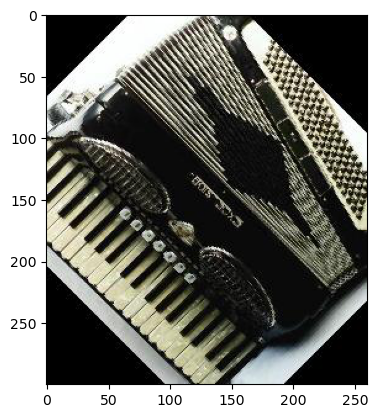

In [12]:

img = mpimg.imread(filenames[0])
imgplot = plt.imshow(img)
plt.show()

In [13]:

feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

C:\Users\chaima\AppData\Local\Temp\ipykernel_6940\219094057.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(filenames))):


  0%|          | 0/855 [00:00<?, ?it/s]

1/1 [==============================] - 0s 202ms/step


1/1 [==============================] - 0s 198ms/step


1/1 [==============================] - 0s 209ms/step


1/1 [==============================] - 0s 209ms/step


1/1 [==============================] - 0s 201ms/step


1/1 [==============================] - 0s 202ms/step


# Save data

In [14]:
pickle.dump(feature_list, open('features-lst.pickle', 'wb'))
pickle.dump(filenames, open('filenames-lst.pickle','wb'))

# Similarity Search

## Load data

In [15]:
filenames = pickle.load(open('filenames-lst.pickle', 'rb'))
feature_list = pickle.load(open('features-lst.pickle', 'rb'))

In [16]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute',metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[0]])

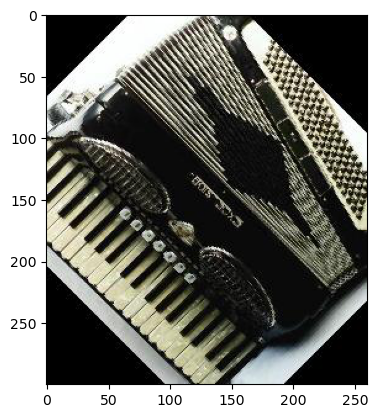

In [17]:
plt.imshow(mpimg.imread(filenames[0]))

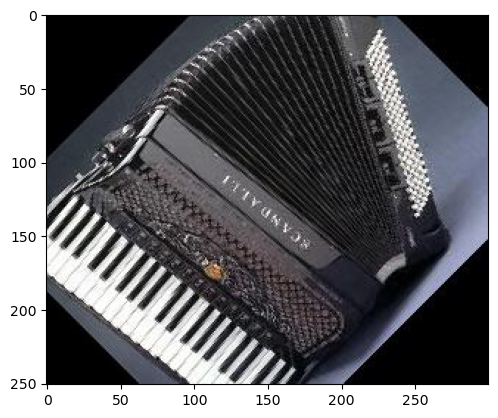

In [18]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]))

In [19]:
for i in range(5):
    print(distances[0][i])

8.5600654e-08
1.117783
1.1505105
1.1700674
1.1708245


In [23]:
import matplotlib 
def plot_images(imgs, distances):
    # Show subplots | shape: (1,3) 
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,5))
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
        plt.imshow(mpimg.imread(imgs[i]), cmap=plt.cm.jet)
        #plt.colorbar()
        if i == 0:
            plt.title('Query image')
        else:
            plt.title('Similar image \n Distance '+str(distances[i]))

    plt.show()

In [7]:
filenames[6100]

'dataset\\ibis\\image_0019.jpg'

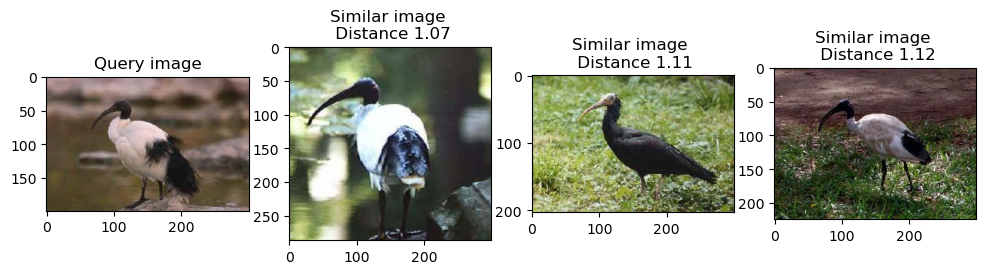

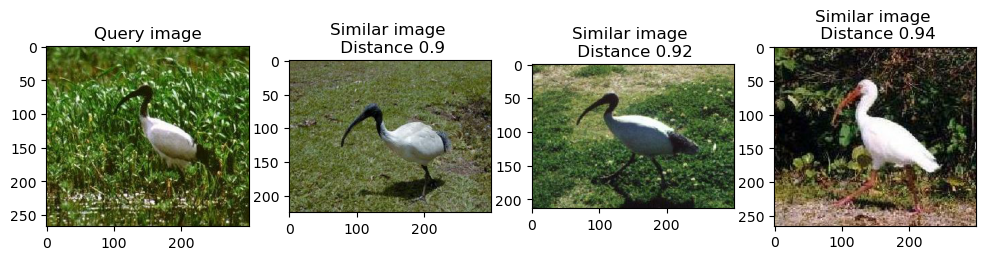

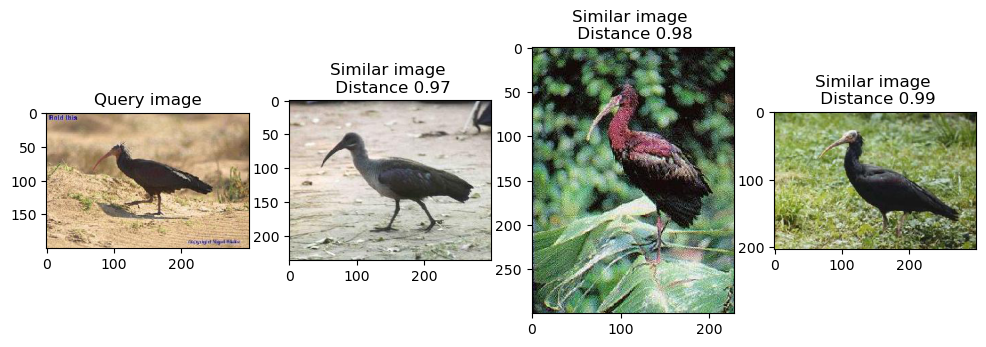

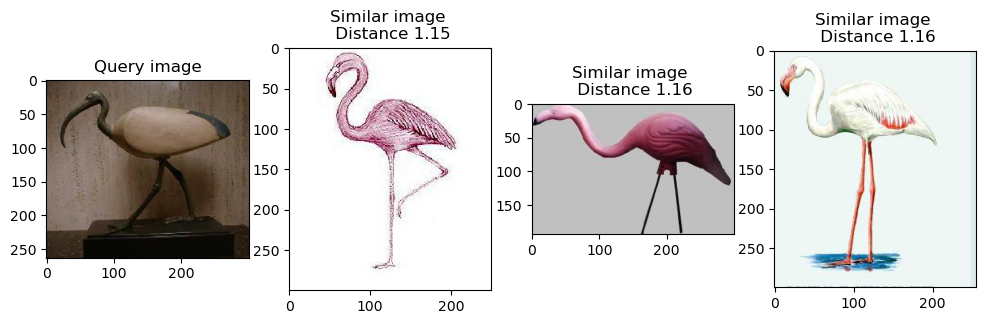

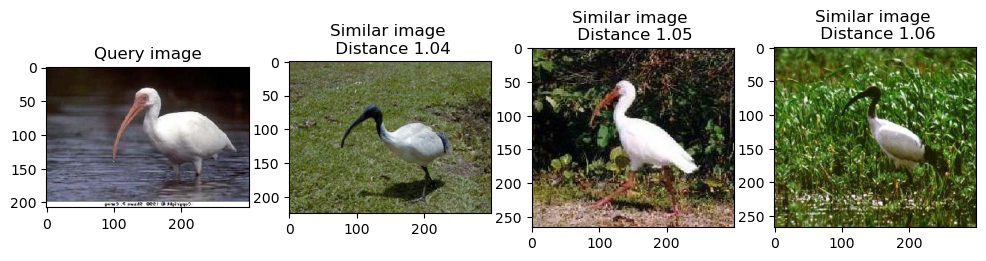

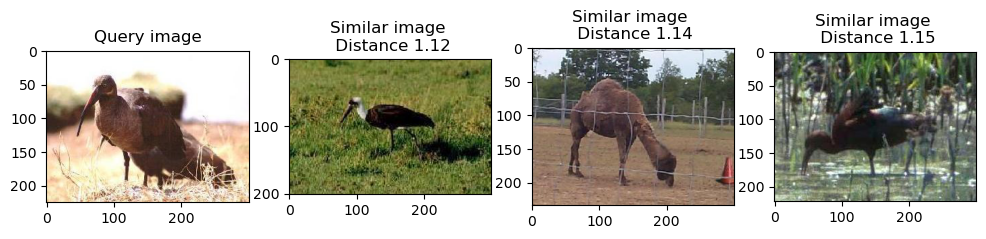

In [27]:
class FeatureExtractor:
  for i in range(6):
     random_image_index = random.randint(6100,6150)
     distances, indices = neighbors.kneighbors([feature_list[random_image_index]])
     # don't take the first closest image as it will be the same image
     similar_image_paths = [filenames[random_image_index]] + [filenames[indices[0][i]] for i in range(1,4)]
     dist= [round(i,2) for i in distances[0]]
     plot_images(similar_image_paths,dist)